In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from ipywidgets import interact, IntSlider
import pandas as pd

In [ ]:
def metodo_ponto_fixo(g, x0, tol=1e-6, max_iter=100):
    """
    Implementação do Método de Ponto Fixo
    
    Parâmetros:
    g - função de iteração g(x)
    x0 - aproximação inicial
    tol - tolerância (critério de parada)
    max_iter - número máximo de iterações
    
    Retorna:
    DataFrame com as iterações e gráfico interativo
    """
    iteracoes = []
    x_vals = [x0]
    
    for i in range(max_iter):
        x_new = g(x_vals[-1])
        erro = abs(x_new - x_vals[-1])
        
        iteracoes.append([i+1, x_vals[-1], x_new, erro])
        x_vals.append(x_new)
        
        if erro < tol:
            break
    
    # Criação do gráfico interativo
    x_plot = np.linspace(min(x_vals)-0.5, max(x_vals)+0.5, 400)
    
    def plot_iteracao(n):
        plt.figure(figsize=(10,6))
        plt.plot(x_plot, g(x_plot), label='g(x)')
        plt.plot(x_plot, x_plot, label='y = x')
        
        # Linhas de iteração
        for k in range(n):
            plt.plot([x_vals[k], x_vals[k]], 
                    [x_vals[k], g(x_vals[k])], 'r--')
            plt.plot([x_vals[k], g(x_vals[k])], 
                    [g(x_vals[k]), g(x_vals[k])], 'r--')
        
        plt.scatter(x_vals[:n+1], [g(x) for x in x_vals[:n+1]], c='red')
        plt.title(f'Iteração {n}')
        plt.legend()
        plt.grid()
        plt.show()
    
    interact(plot_iteracao, n=IntSlider(min=0, max=len(iteracoes)-1, value=0))
    
    return pd.DataFrame(iteracoes, 
                      columns=['Iteração', 'x_i', 'x_{i+1}', 'Erro'])

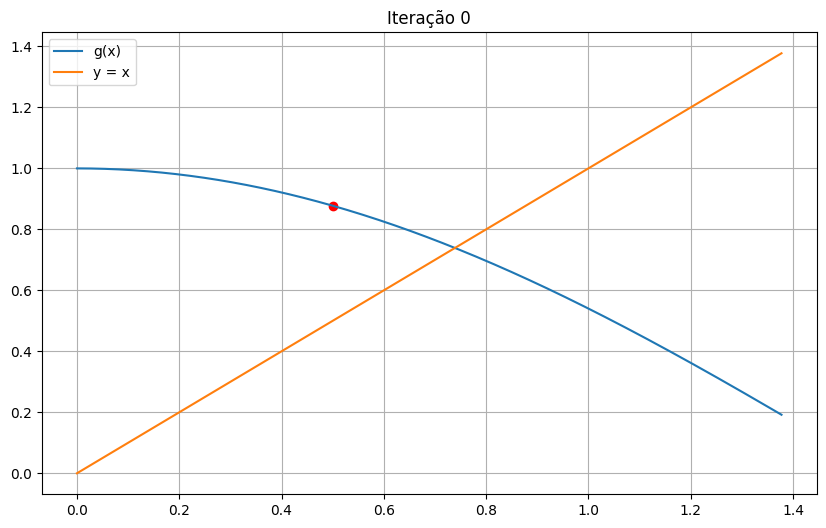

interactive(children=(IntSlider(value=0, description='n', max=33), Output()), _dom_classes=('widget-interact',…

,Iteração,x_i,x_{i+1},Erro
0,1,0.500000,0.877583,3.775826e-01
1,2,0.877583,0.639012,2.385701e-01
2,3,0.639012,0.802685,1.636726e-01
3,4,0.802685,0.694778,1.079071e-01
4,5,0.694778,0.768196,7.341780e-02
5,6,0.768196,0.719165,4.903039e-02
6,7,0.719165,0.752356,3.319031e-02
7,8,0.752356,0.730081,2.227470e-02
8,9,0.730081,0.745120,1.503928e-02
9,10,0.745120,0.735006,1.011403e-02


In [ ]:
# Definindo a função de iteração para f(x) = x - cos(x) = 0
g = lambda x: np.cos(x)

# Aplicando o método
resultado_pf = metodo_ponto_fixo(g, 0.5)
resultado_pf